Lab | Customer Analysis Round 4

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.
Get the data

We are using the marketing_customer_analysis.csv file.
Dealing with the data

Already done in the round 2.
Explore the data

Done in the round 3.
Processing Data

    Get the numeric data.
    Check normality.
    Check multicollinearity.


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
#data = pd.read_csv(r"marketing_customer_analysis.csv")

In [9]:
cd csv_files

C:\Users\jaanu\Ironhack Course Work\Week 1\lab-customer-analysis-round-4\files_for_lab\csv_files


In [13]:
data = pd.read_csv(r"data_lab2.csv")

In [14]:
data.head()

,Unnamed: 0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [15]:
data.dtypes

Unnamed: 0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [16]:
data_numeric = data.select_dtypes(['number'])

In [17]:
data_numeric

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,2763.519279,56274,69,32,5,0,1,384.811147
1,1,6979.535903,0,94,13,42,0,8,1131.464935
2,2,12887.431650,48767,108,18,38,0,2,566.472247
3,3,7645.861827,0,106,18,65,0,7,529.881344
4,4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,9131,8163.890428,0,85,9,37,3,2,790.784983
9132,9132,7524.442436,21941,96,34,3,0,3,691.200000


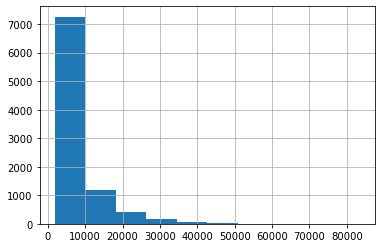

In [18]:
data_numeric['customer_lifetime_value'].hist()

In [23]:
for col in data_numeric.columns: 
    print(col)

Unnamed: 0
customer_lifetime_value
income
monthly_premium_auto
months_since_last_claim
months_since_policy_inception
number_of_open_complaints
number_of_policies
total_claim_amount


AxesSubplot(0.125,0.125;0.775x0.755)


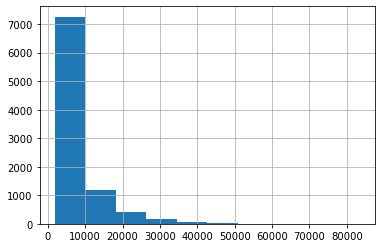

In [26]:
print(data_numeric['customer_lifetime_value'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


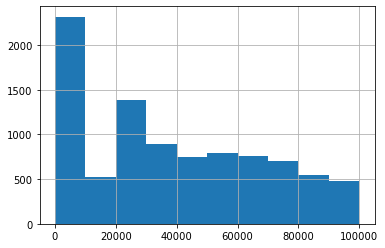

In [25]:
print(data_numeric['income'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


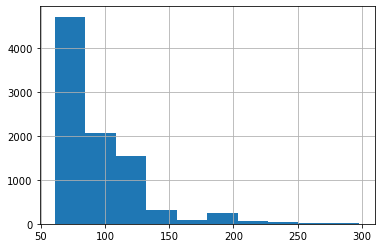

In [27]:
print(data_numeric['monthly_premium_auto'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


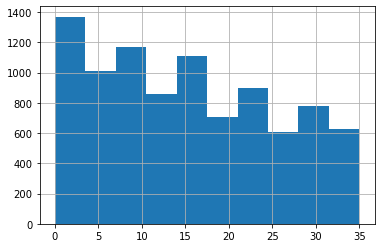

In [28]:
print(data_numeric['months_since_last_claim'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


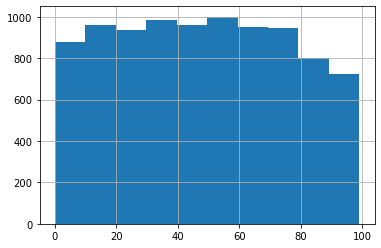

In [29]:
print(data_numeric['months_since_policy_inception'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


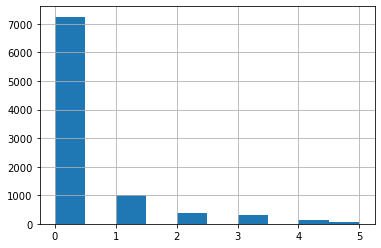

In [30]:
print(data_numeric['number_of_open_complaints'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


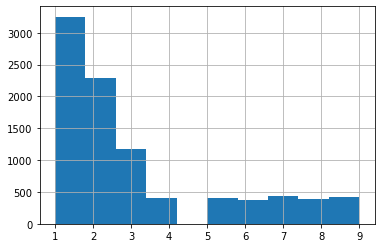

In [31]:
print(data_numeric['number_of_policies'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


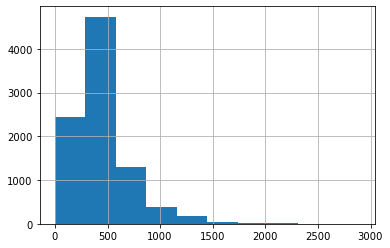

In [32]:
print(data_numeric['total_claim_amount'].hist())

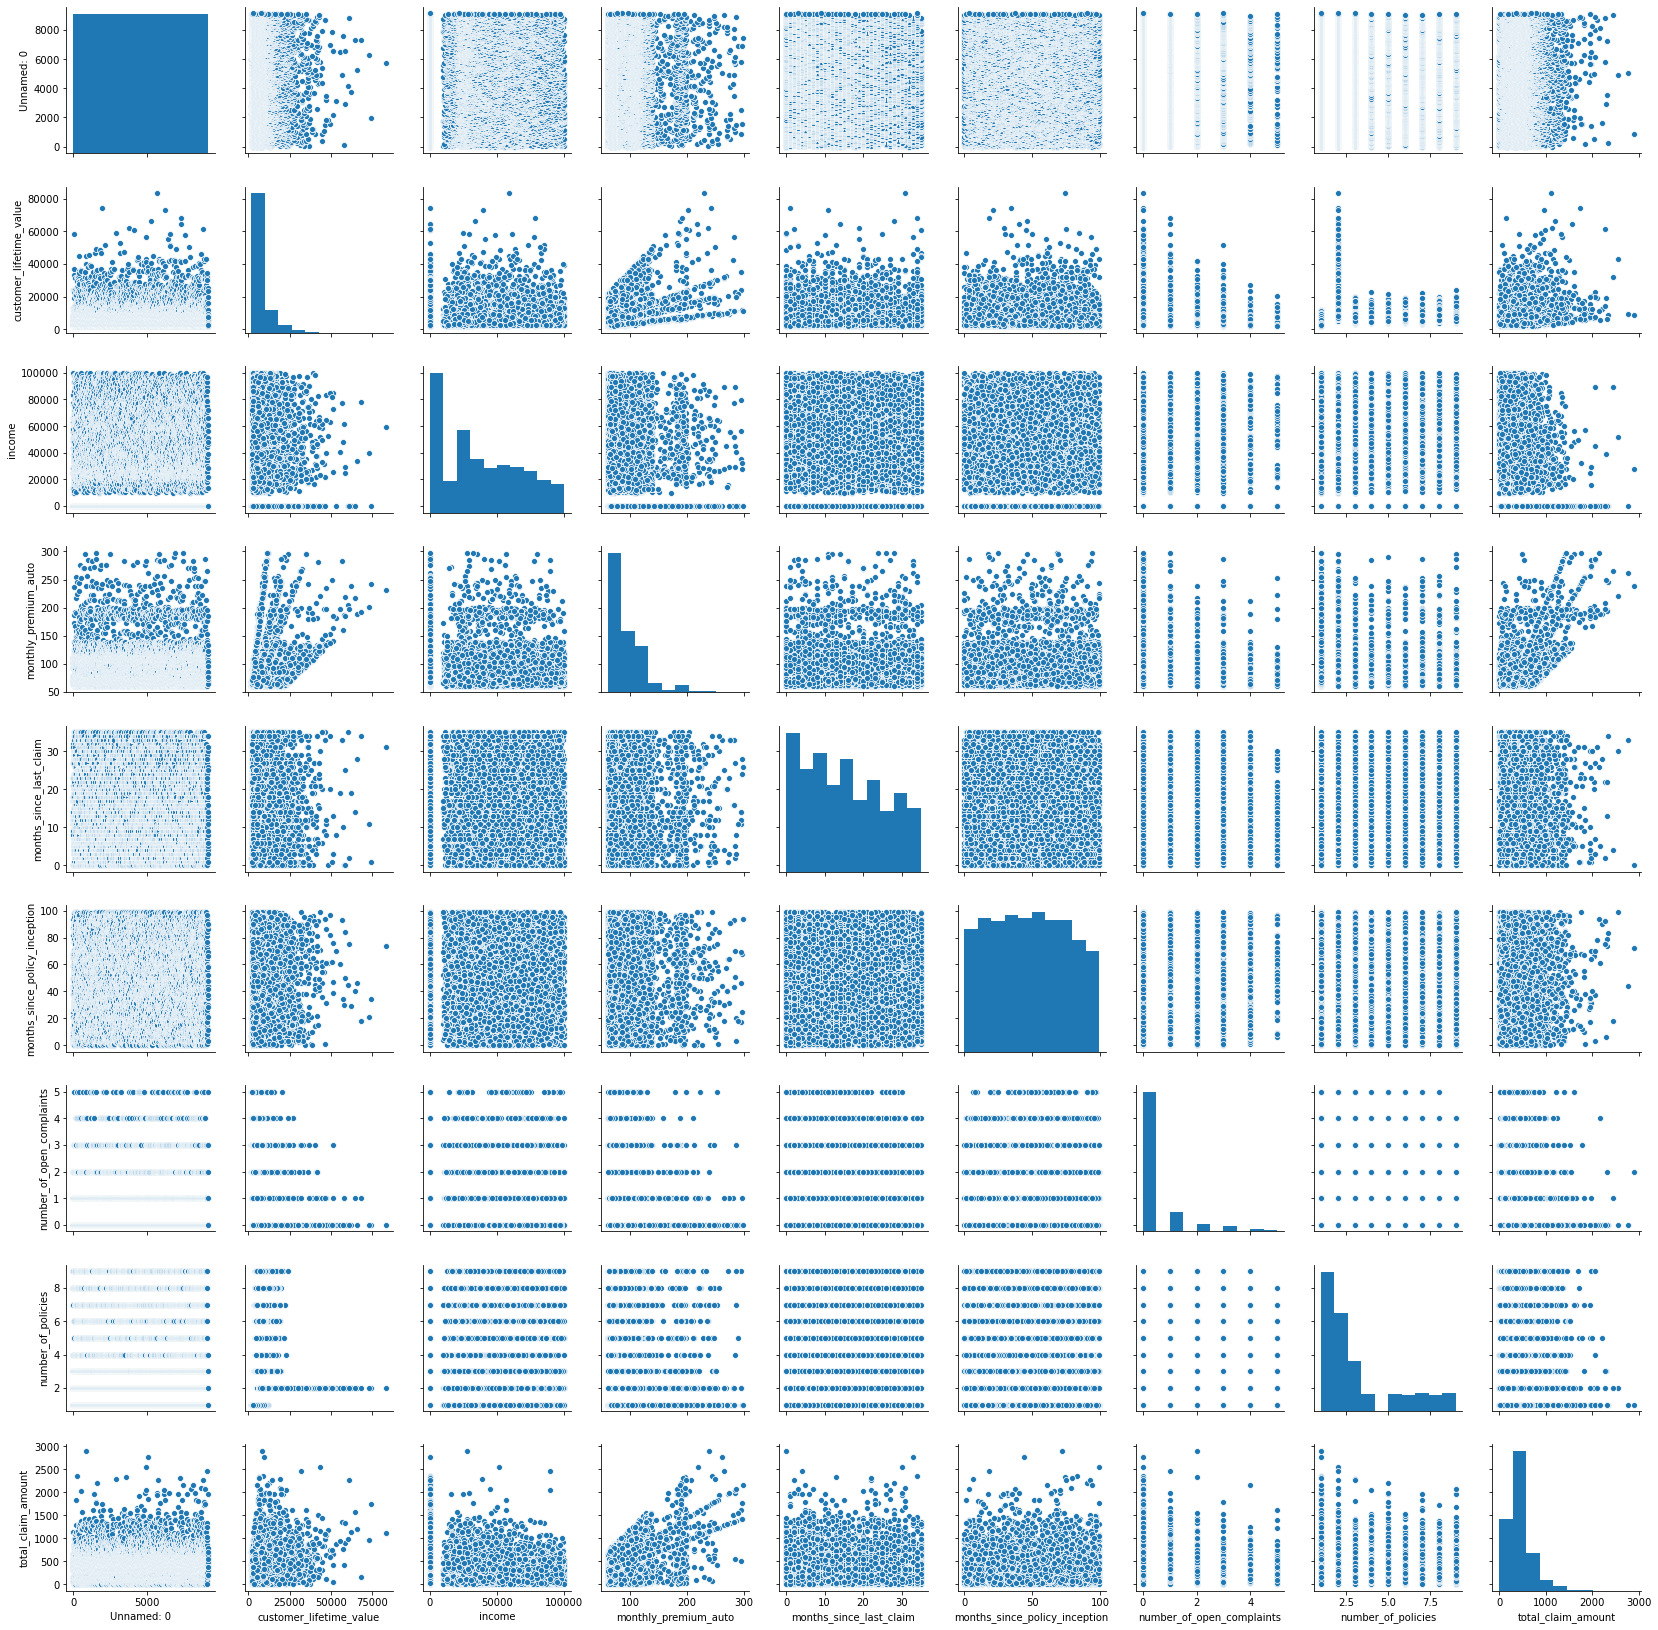

In [37]:
sns.pairplot(data_numeric)

In [33]:
#linear regression

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
Y = data_numeric['customer_lifetime_value']
X = data_numeric.drop(['customer_lifetime_value'], axis=1)
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

0.1604219768964088

In [34]:
#multcollinearity

import statsmodels.api as sm
from statsmodels.formula.api import ols
Y = data_numeric['customer_lifetime_value']
X = data_numeric.drop(['customer_lifetime_value'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     customer_lifetime_value   R-squared:                       0.160
Model:                                 OLS   Adj. R-squared:                  0.160
Method:                      Least Squares   F-statistic:                     217.9
Date:                     Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                             17:00:11   Log-Likelihood:                -92861.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9125   BIC:                         1.858e+05
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------